In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24

plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36



In [23]:
def wavemeter_processor(year,month,day,bead_date,bead_number):
    

    dirname="/data/SC_data/Wavemeter/Data/"
    df_wavemeter = pd.DataFrame()
    hour = 0
    minute = 0
    date = str(day).zfill(2)+"."+str(month).zfill(2)+"."+str(year)
    wavelength=[]
    time_stamp=[]
    
    basic_folder = "/data/new_trap_processed/processed_files/%s/Bead%s/EnvData/" %(bead_date,bead_number)
    output_folder =  basic_folder + "%s" %(str(year)+str(month).zfill(2)+str(day).zfill(2))
    try: os.makedirs(basic_folder)
    except: print("Did not create %s. It may exist or you do not have perimissions." %basic_folder)
    try: os.mkdir(output_folder)
    except: print("Did not create output folder:%s. It may exist or you do not have perimissions."% output_folder)
    
    for hour in tqdm(np.arange(0,24,1)):
        for minute in np.arange(0,60,1):
            try:
                file = "%s, %s.%s" %(date,str(hour).zfill(2),str(minute).zfill(2))
                filename= dirname + str([file_ for file_ in os.listdir(dirname) if file_.startswith(file) if file_.endswith('OnReset.lta')][0])
                with open(filename,"r") as fin:  
                        start_at = dropwhile(lambda L: 'Time' not in L.split(), fin)
                        for line in islice(start_at, 1, None): # ignore the line still with Abstract in
                            time_line = float(line.replace('\n',"").split("\t")[0])
                            #print(time_line)
                            seconds=(int(time_line/1000))
                            if(seconds<60):
                                #print(seconds)
                                microseconds=int(1000*time_line-seconds*1e6)
                                wavelength.append(float(line.replace('\n',"").split("\t")[1]))
                                time_stamp.append(dt.datetime(year,month,day,hour,minute,seconds,microseconds))
            except:print("%d%d does not exist or did not work"  %(hour,minute))               
    df_wavemeter["WAVE_LENGTH"] = wavelength
    df_wavemeter["LASER_FREQ"] = np.divide(np.divide(3e8,np.divide(wavelength,1e9)),1e12)

    df_wavemeter["TIMESTAMP_WM"] = time_stamp
    df_wavemeter["TIMESTAMP_WM_EPOCH"] = df_wavemeter["TIMESTAMP_WM"].apply(lambda element: dt.datetime.timestamp(element))
    
    processed_file_name = output_folder + "/wavemeter_data_%s%s%s.pkl" %(year,str(month).zfill(2),str(day).zfill(2)) # create the filename
    if(os.path.isfile(processed_file_name)==False):
    #df.to_csv(processed_file_name.replace(".pkl",".csv"),index=False) ## comment back in if you want a .csv for whatever reason
        df_wavemeter.to_pickle(processed_file_name) 
    else: print("Wave meter file %s exists already" %processed_file_name)  
    return df_wavemeter

In [24]:
year = 2020
month=9
day=25
bead_date=20200924
bead_number=1
df = wavemeter_processor(year,month,day,str(bead_date),bead_number)

  0%|          | 0/24 [00:00<?, ?it/s]

Did not create /data/new_trap_processed/processed_files/20200924/Bead1/EnvData/. It may exist or you do not have perimissions.
Did not create output folder:/data/new_trap_processed/processed_files/20200924/Bead1/EnvData/20200925. It may exist or you do not have perimissions.
00 does not exist or did not work
01 does not exist or did not work
02 does not exist or did not work
03 does not exist or did not work
04 does not exist or did not work
05 does not exist or did not work
06 does not exist or did not work
07 does not exist or did not work
08 does not exist or did not work
09 does not exist or did not work
010 does not exist or did not work
011 does not exist or did not work
012 does not exist or did not work
013 does not exist or did not work
014 does not exist or did not work
015 does not exist or did not work
016 does not exist or did not work
017 does not exist or did not work
018 does not exist or did not work
019 does not exist or did not work
020 does not exist or did not work

  4%|▍         | 1/24 [00:00<00:06,  3.39it/s]

040 does not exist or did not work
041 does not exist or did not work
042 does not exist or did not work
043 does not exist or did not work
044 does not exist or did not work
045 does not exist or did not work
046 does not exist or did not work
047 does not exist or did not work
048 does not exist or did not work
049 does not exist or did not work
050 does not exist or did not work
051 does not exist or did not work
052 does not exist or did not work
053 does not exist or did not work
054 does not exist or did not work
055 does not exist or did not work
056 does not exist or did not work
057 does not exist or did not work
058 does not exist or did not work
059 does not exist or did not work
10 does not exist or did not work
11 does not exist or did not work
12 does not exist or did not work
13 does not exist or did not work
14 does not exist or did not work
15 does not exist or did not work
16 does not exist or did not work
17 does not exist or did not work
18 does not exist or did not

  8%|▊         | 2/24 [00:00<00:06,  3.41it/s]

122 does not exist or did not work
123 does not exist or did not work
124 does not exist or did not work
125 does not exist or did not work
126 does not exist or did not work
127 does not exist or did not work
128 does not exist or did not work
129 does not exist or did not work
130 does not exist or did not work
131 does not exist or did not work
132 does not exist or did not work
133 does not exist or did not work
134 does not exist or did not work
135 does not exist or did not work
136 does not exist or did not work
137 does not exist or did not work
138 does not exist or did not work
139 does not exist or did not work
140 does not exist or did not work
141 does not exist or did not work
142 does not exist or did not work
143 does not exist or did not work
144 does not exist or did not work
145 does not exist or did not work
146 does not exist or did not work
147 does not exist or did not work
148 does not exist or did not work
149 does not exist or did not work
150 does not exist o

 12%|█▎        | 3/24 [00:00<00:06,  3.42it/s]

247 does not exist or did not work
248 does not exist or did not work
249 does not exist or did not work
250 does not exist or did not work
251 does not exist or did not work
252 does not exist or did not work
253 does not exist or did not work
254 does not exist or did not work
255 does not exist or did not work
256 does not exist or did not work
257 does not exist or did not work
258 does not exist or did not work
259 does not exist or did not work
30 does not exist or did not work
31 does not exist or did not work
32 does not exist or did not work
33 does not exist or did not work
34 does not exist or did not work
35 does not exist or did not work
36 does not exist or did not work
37 does not exist or did not work
38 does not exist or did not work
39 does not exist or did not work
310 does not exist or did not work
311 does not exist or did not work
312 does not exist or did not work
313 does not exist or did not work
314 does not exist or did not work
315 does not exist or did not 

 17%|█▋        | 4/24 [00:01<00:05,  3.42it/s]

329 does not exist or did not work
330 does not exist or did not work
331 does not exist or did not work
332 does not exist or did not work
333 does not exist or did not work
334 does not exist or did not work
335 does not exist or did not work
336 does not exist or did not work
337 does not exist or did not work
338 does not exist or did not work
339 does not exist or did not work
340 does not exist or did not work
341 does not exist or did not work
342 does not exist or did not work
343 does not exist or did not work
344 does not exist or did not work
345 does not exist or did not work
346 does not exist or did not work
347 does not exist or did not work
348 does not exist or did not work
349 does not exist or did not work
350 does not exist or did not work
351 does not exist or did not work
352 does not exist or did not work
353 does not exist or did not work
354 does not exist or did not work
355 does not exist or did not work
356 does not exist or did not work
357 does not exist o

 21%|██        | 5/24 [00:01<00:05,  3.43it/s]

453 does not exist or did not work
454 does not exist or did not work
455 does not exist or did not work
456 does not exist or did not work
457 does not exist or did not work
458 does not exist or did not work
459 does not exist or did not work
50 does not exist or did not work
51 does not exist or did not work
52 does not exist or did not work
53 does not exist or did not work
54 does not exist or did not work
55 does not exist or did not work
56 does not exist or did not work
57 does not exist or did not work
58 does not exist or did not work
59 does not exist or did not work
510 does not exist or did not work
511 does not exist or did not work
512 does not exist or did not work
513 does not exist or did not work
514 does not exist or did not work
515 does not exist or did not work
516 does not exist or did not work
517 does not exist or did not work
518 does not exist or did not work
519 does not exist or did not work
520 does not exist or did not work
521 does not exist or did not 

 25%|██▌       | 6/24 [00:01<00:05,  3.44it/s]

535 does not exist or did not work
536 does not exist or did not work
537 does not exist or did not work
538 does not exist or did not work
539 does not exist or did not work
540 does not exist or did not work
541 does not exist or did not work
542 does not exist or did not work
543 does not exist or did not work
544 does not exist or did not work
545 does not exist or did not work
546 does not exist or did not work
547 does not exist or did not work
548 does not exist or did not work
549 does not exist or did not work
550 does not exist or did not work
551 does not exist or did not work
552 does not exist or did not work
553 does not exist or did not work
554 does not exist or did not work
555 does not exist or did not work
556 does not exist or did not work
557 does not exist or did not work
558 does not exist or did not work
559 does not exist or did not work
60 does not exist or did not work
61 does not exist or did not work
62 does not exist or did not work
63 does not exist or di

 29%|██▉       | 7/24 [00:02<00:04,  3.45it/s]

617 does not exist or did not work
618 does not exist or did not work
619 does not exist or did not work
620 does not exist or did not work
621 does not exist or did not work
622 does not exist or did not work
623 does not exist or did not work
624 does not exist or did not work
625 does not exist or did not work
626 does not exist or did not work
627 does not exist or did not work
628 does not exist or did not work
629 does not exist or did not work
630 does not exist or did not work
631 does not exist or did not work
632 does not exist or did not work
633 does not exist or did not work
634 does not exist or did not work
635 does not exist or did not work
636 does not exist or did not work
637 does not exist or did not work
638 does not exist or did not work
639 does not exist or did not work
640 does not exist or did not work
641 does not exist or did not work
642 does not exist or did not work
643 does not exist or did not work
644 does not exist or did not work
645 does not exist o

 33%|███▎      | 8/24 [00:02<00:04,  3.40it/s]

741 does not exist or did not work
742 does not exist or did not work
743 does not exist or did not work
744 does not exist or did not work
745 does not exist or did not work
746 does not exist or did not work
747 does not exist or did not work
748 does not exist or did not work
749 does not exist or did not work
750 does not exist or did not work
751 does not exist or did not work
752 does not exist or did not work
753 does not exist or did not work
754 does not exist or did not work
755 does not exist or did not work
756 does not exist or did not work
757 does not exist or did not work
758 does not exist or did not work
759 does not exist or did not work
80 does not exist or did not work
81 does not exist or did not work
82 does not exist or did not work
83 does not exist or did not work
84 does not exist or did not work
85 does not exist or did not work
86 does not exist or did not work
87 does not exist or did not work
88 does not exist or did not work
89 does not exist or did not 

 38%|███▊      | 9/24 [00:02<00:04,  3.42it/s]

822 does not exist or did not work
823 does not exist or did not work
824 does not exist or did not work
825 does not exist or did not work
826 does not exist or did not work
827 does not exist or did not work
828 does not exist or did not work
829 does not exist or did not work
830 does not exist or did not work
831 does not exist or did not work
832 does not exist or did not work
833 does not exist or did not work
834 does not exist or did not work
835 does not exist or did not work
836 does not exist or did not work
837 does not exist or did not work
838 does not exist or did not work
839 does not exist or did not work
840 does not exist or did not work
841 does not exist or did not work
842 does not exist or did not work
843 does not exist or did not work
844 does not exist or did not work
845 does not exist or did not work
846 does not exist or did not work
847 does not exist or did not work
848 does not exist or did not work
849 does not exist or did not work
850 does not exist o

 42%|████▏     | 10/24 [00:02<00:04,  3.41it/s]

945 does not exist or did not work
946 does not exist or did not work
947 does not exist or did not work
948 does not exist or did not work
949 does not exist or did not work
950 does not exist or did not work
951 does not exist or did not work
952 does not exist or did not work
953 does not exist or did not work
954 does not exist or did not work
955 does not exist or did not work
956 does not exist or did not work
957 does not exist or did not work
958 does not exist or did not work
959 does not exist or did not work
100 does not exist or did not work
101 does not exist or did not work
102 does not exist or did not work
103 does not exist or did not work
104 does not exist or did not work
105 does not exist or did not work
106 does not exist or did not work
107 does not exist or did not work
108 does not exist or did not work
109 does not exist or did not work
1010 does not exist or did not work
1011 does not exist or did not work
1012 does not exist or did not work
1013 does not exi

 46%|████▌     | 11/24 [00:03<00:03,  3.41it/s]

1028 does not exist or did not work
1029 does not exist or did not work
1030 does not exist or did not work
1031 does not exist or did not work
1032 does not exist or did not work
1033 does not exist or did not work
1034 does not exist or did not work
1035 does not exist or did not work
1036 does not exist or did not work
1037 does not exist or did not work
1038 does not exist or did not work
1039 does not exist or did not work
1040 does not exist or did not work
1041 does not exist or did not work
1042 does not exist or did not work
1043 does not exist or did not work
1044 does not exist or did not work
1045 does not exist or did not work
1046 does not exist or did not work
1047 does not exist or did not work
1048 does not exist or did not work
1049 does not exist or did not work
1050 does not exist or did not work
1051 does not exist or did not work
1052 does not exist or did not work
1053 does not exist or did not work
1054 does not exist or did not work
1055 does not exist or did n

 50%|█████     | 12/24 [00:03<00:03,  3.42it/s]

1152 does not exist or did not work
1153 does not exist or did not work
1154 does not exist or did not work
1155 does not exist or did not work
1156 does not exist or did not work
1157 does not exist or did not work
1158 does not exist or did not work
1159 does not exist or did not work
120 does not exist or did not work
121 does not exist or did not work
122 does not exist or did not work
123 does not exist or did not work
124 does not exist or did not work
125 does not exist or did not work
126 does not exist or did not work
127 does not exist or did not work
128 does not exist or did not work
129 does not exist or did not work
1210 does not exist or did not work
1211 does not exist or did not work
1212 does not exist or did not work
1213 does not exist or did not work
1214 does not exist or did not work
1215 does not exist or did not work
1216 does not exist or did not work
1217 does not exist or did not work
1218 does not exist or did not work
1219 does not exist or did not work
12

 54%|█████▍    | 13/24 [00:03<00:03,  3.42it/s]

1235 does not exist or did not work
1236 does not exist or did not work
1237 does not exist or did not work
1238 does not exist or did not work
1239 does not exist or did not work
1240 does not exist or did not work
1241 does not exist or did not work
1242 does not exist or did not work
1243 does not exist or did not work
1244 does not exist or did not work
1245 does not exist or did not work
1246 does not exist or did not work
1247 does not exist or did not work
1248 does not exist or did not work
1249 does not exist or did not work
1250 does not exist or did not work
1251 does not exist or did not work
1252 does not exist or did not work
1253 does not exist or did not work
1254 does not exist or did not work
1255 does not exist or did not work
1256 does not exist or did not work
1257 does not exist or did not work
1258 does not exist or did not work
1259 does not exist or did not work
130 does not exist or did not work
131 does not exist or did not work
132 does not exist or did not 

 58%|█████▊    | 14/24 [00:04<00:02,  3.43it/s]

1317 does not exist or did not work
1318 does not exist or did not work
1319 does not exist or did not work
1320 does not exist or did not work
1321 does not exist or did not work
1322 does not exist or did not work
1323 does not exist or did not work
1324 does not exist or did not work
1325 does not exist or did not work
1326 does not exist or did not work
1327 does not exist or did not work
1328 does not exist or did not work
1329 does not exist or did not work
1330 does not exist or did not work
1331 does not exist or did not work
1332 does not exist or did not work
1333 does not exist or did not work
1334 does not exist or did not work
1335 does not exist or did not work
1336 does not exist or did not work
1337 does not exist or did not work
1338 does not exist or did not work
1339 does not exist or did not work
1340 does not exist or did not work
1341 does not exist or did not work
1342 does not exist or did not work
1343 does not exist or did not work
1344 does not exist or did n

 62%|██████▎   | 15/24 [00:04<00:02,  3.41it/s]

1441 does not exist or did not work
1442 does not exist or did not work
1443 does not exist or did not work
1444 does not exist or did not work
1445 does not exist or did not work
1446 does not exist or did not work
1447 does not exist or did not work
1448 does not exist or did not work
1449 does not exist or did not work
1450 does not exist or did not work
1451 does not exist or did not work
1452 does not exist or did not work
1453 does not exist or did not work
1454 does not exist or did not work
1455 does not exist or did not work
1456 does not exist or did not work
1457 does not exist or did not work
1458 does not exist or did not work
1459 does not exist or did not work
150 does not exist or did not work
151 does not exist or did not work
152 does not exist or did not work
153 does not exist or did not work
154 does not exist or did not work
155 does not exist or did not work
156 does not exist or did not work
157 does not exist or did not work
158 does not exist or did not work
1

 67%|██████▋   | 16/24 [00:04<00:02,  3.43it/s]

1523 does not exist or did not work
1524 does not exist or did not work
1525 does not exist or did not work
1526 does not exist or did not work
1527 does not exist or did not work
1528 does not exist or did not work
1529 does not exist or did not work
1530 does not exist or did not work
1531 does not exist or did not work
1532 does not exist or did not work
1533 does not exist or did not work
1534 does not exist or did not work
1535 does not exist or did not work
1536 does not exist or did not work
1537 does not exist or did not work
1538 does not exist or did not work
1539 does not exist or did not work
1540 does not exist or did not work
1541 does not exist or did not work
1542 does not exist or did not work
1543 does not exist or did not work
1544 does not exist or did not work
1545 does not exist or did not work
1546 does not exist or did not work
1547 does not exist or did not work
1548 does not exist or did not work
1549 does not exist or did not work
1550 does not exist or did n

 71%|███████   | 17/24 [00:05<00:02,  3.15it/s]

1637 does not exist or did not work
1638 does not exist or did not work
1639 does not exist or did not work
1640 does not exist or did not work
1641 does not exist or did not work
1642 does not exist or did not work
1643 does not exist or did not work
1644 does not exist or did not work
1645 does not exist or did not work
1646 does not exist or did not work
1647 does not exist or did not work
1648 does not exist or did not work
1649 does not exist or did not work
1650 does not exist or did not work
1651 does not exist or did not work
1652 does not exist or did not work
1654 does not exist or did not work
1655 does not exist or did not work
1656 does not exist or did not work
1657 does not exist or did not work
1658 does not exist or did not work
1659 does not exist or did not work
170 does not exist or did not work
171 does not exist or did not work
172 does not exist or did not work
173 does not exist or did not work
174 does not exist or did not work
175 does not exist or did not wor

 83%|████████▎ | 20/24 [00:06<00:01,  2.52it/s]

204 does not exist or did not work


100%|██████████| 24/24 [00:08<00:00,  2.32it/s]


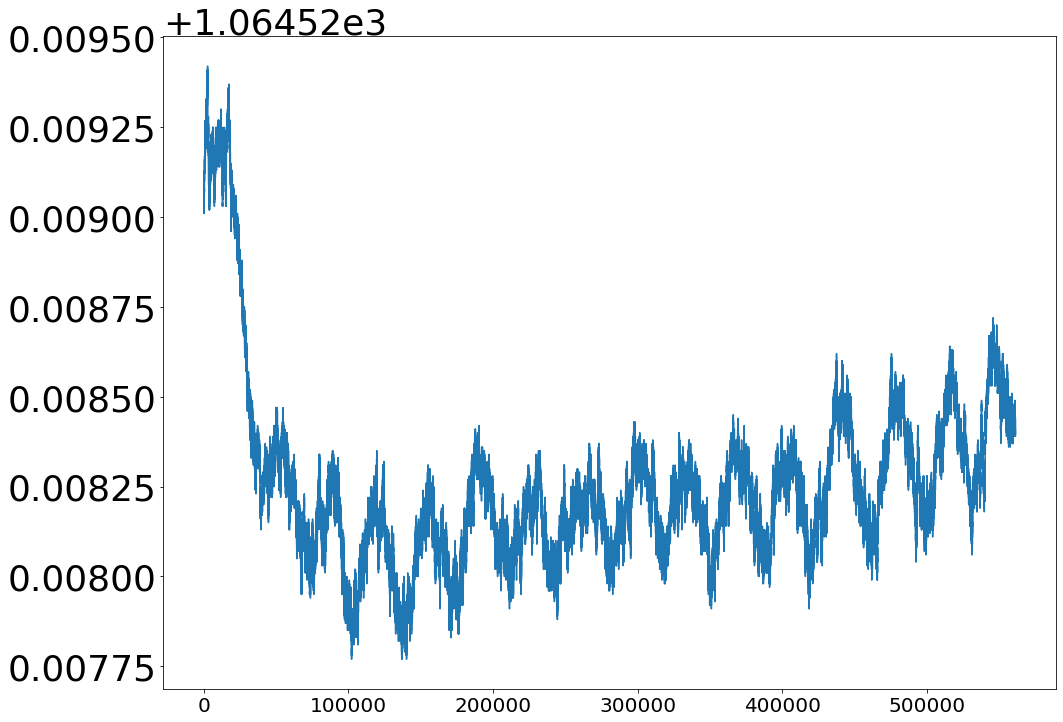

In [25]:
plt.plot(df.WAVE_LENGTH)

In [77]:
def run_environment_processor_batch(year,month,day_start,day_end,bead_date,bead_number=1):
    """
    Wrapper to run the environmental processor in a practical way. This way it works for an entire month if necessary. We had no bead living longer than a month. So further scripting will not be done until they start to behave as annual events!
    Inputs are: 
    year = year of interest as int, i.e. where the measurement was performed 
    month = same as above
    start_day = the day to start with
    end_day = the day to end with
    bead_date = day the bead was trapped (YYYYMMDD)
    bead_number= number of the bead that date
    """
    day = range(day_start,day_end+1,1)
    year = [year]*len(day)
    month = [month]*len(day)
    dataset_list=(year,month,day)
    dataset_list_T=np.transpose(dataset_list)
    for year,month,day in tqdm(dataset_list_T):
        environment_processor(year,month,day,str(bead_date),bead_number)
    return print("Done")

0
/data/SC_data/Wavemeter/20200923/29.09.2020, 22.00,  281.62023 THz, OnReset.lta
1
/data/SC_data/Wavemeter/20200923/29.09.2020, 22.01,  281.62019 THz, OnReset.lta
2
/data/SC_data/Wavemeter/20200923/29.09.2020, 22.02,  281.62019 THz, OnReset.lta
3
/data/SC_data/Wavemeter/20200923/29.09.2020, 22.03,  281.62018 THz, OnReset.lta
4
/data/SC_data/Wavemeter/20200923/29.09.2020, 22.04,  281.62018 THz, OnReset.lta
5
/data/SC_data/Wavemeter/20200923/29.09.2020, 22.05,  281.62014 THz, OnReset.lta
6
/data/SC_data/Wavemeter/20200923/29.09.2020, 22.06,  281.62015 THz, OnReset.lta
7
/data/SC_data/Wavemeter/20200923/29.09.2020, 22.07,  281.62015 THz, OnReset.lta
8
/data/SC_data/Wavemeter/20200923/29.09.2020, 22.08,  281.62016 THz, OnReset.lta
9
/data/SC_data/Wavemeter/20200923/29.09.2020, 22.09,  281.62015 THz, OnReset.lta
10
/data/SC_data/Wavemeter/20200923/29.09.2020, 22.10,  281.62016 THz, OnReset.lta
11
/data/SC_data/Wavemeter/20200923/29.09.2020, 22.11,  281.62014 THz, OnReset.lta
12
/data/SC_da

IndexError: list index out of range

In [ ]:
plt.plot(df_wavemeter["TIMESTAMP_WM_EPOCH"],df_wavemeter["LASER_FREQ"])

In [159]:
test ="%d-%d-%d-%d:%d:%0.3f" %(year,month,day,hour,minute,time_stamp[0]/1000) 

In [204]:
i=166
print(time_stamp[i])
seconds=(int(time_stamp[i]/1000))
microseconds=int(1000*time_stamp[i]-seconds*1e6)
dt(year,month,day,hour,minute,seconds,microseconds)

4683.6979


datetime.datetime(2020, 10, 1, 0, 0, 4, 683697)

Text(0, 0.5, 'wavelength')

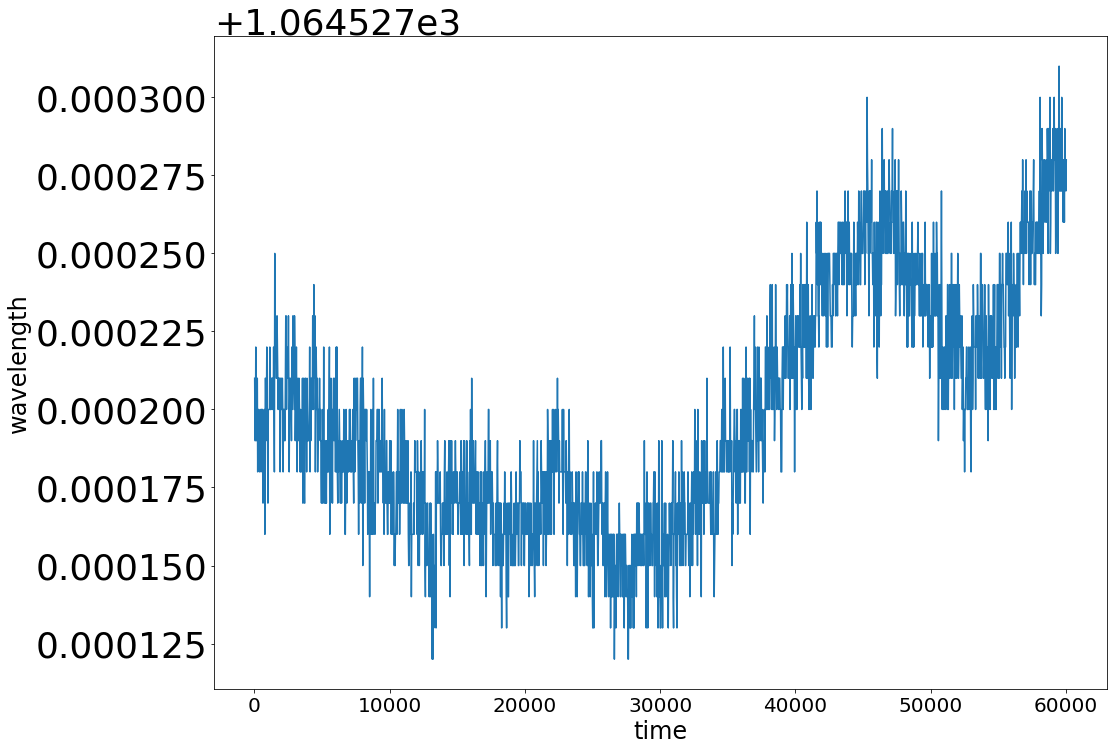

In [119]:
plt.plot(time_stamp,wavelength)
plt.xlabel("time")
plt.ylabel("wavelength")

In [ ]:
def match_wavemeter_data(df,fn):
    '''
    Given a dataframe (df) of heights, one gets the matching environmental data of a list of filenames (fn). If timestamps are to far off a warning will be triggered 
    '''
    df_temp_list = []
    df_temp_list.extend([pd.read_pickle(f) for f in fn]) # read the files in
    df_temp = pd.concat([df_tempi for df_tempi in df_temp_list]).reset_index() # merge the dataframes, you can merge as much as you want since later the time stamps are anyway used. But maybe stay efficient, will ya?
    wave_length,time_stamp_wm,values = [[] for i in range(3)]
    for elements in tqdm(range(len(df))): # fun fact: faster than all the possible apply methods. Tried a lot but this is best. DO NOT PARLLELIZE with joblib
        values = df_temp.iloc[(df_temp['TIMESTAMP_WM_EPOCH']-df["Time_Epoch"][elements]).abs().argsort()[:1]][['WAVE_LENGTH','TIMESTAMP_WM_EPOCH']].values[0]   # this one subtracts the time_epoch of the data set from the entire column and gets the minimum. Afterwards it adds it if the time difference is less than 10 seconds.
        if(np.abs(values[3]-df["Time_Epoch"][elements])<10):
            wave_length.append(values[0])
            time_stamp_wm.append(values[1])
            pressure.append(values[2])
        else:print("Time difference is to big!")
    df["AirTemperature"] = airt
    df["SurfaceTemperature"] = surf
    return df # get your dataframe back with environmental data
